# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
ny = temp[temp.State == "New York"]
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
ny.Temperature.mean().round(2)

10.74

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
more_15 = temp[temp.Temperature > 15]
more_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
cities_15 = temp.drop(["State"], axis = 1)
cities_15

,City,Temperature
0,NYC,19.444444
1,Albany,9.444444
2,Buffalo,3.333333
3,Hartford,17.222222
4,Bridgeport,14.444444
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
cond = cities_15.Temperature < 20
cit_15_20 = cities_15[cond]
cit_15_20

,City,Temperature
0,NYC,19.444444
1,Albany,9.444444
2,Buffalo,3.333333
3,Hartford,17.222222
4,Bridgeport,14.444444


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
print(f"The mean temperature is: {temp.Temperature.mean().round(2)}")
print(f"The standard deviation temperature is: {temp.Temperature.std().round(2)}")

The mean temperature is: 15.16
The standard deviation temperature is: 6.7


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv("employee.csv")
employee.sample(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
8,Ana,HR,Master,F,VP,8,70
5,Eva,Sales,Bachelor,F,associate,2,55


#### Explore the data types of the `employee` dataframe. Comment your results

In [12]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

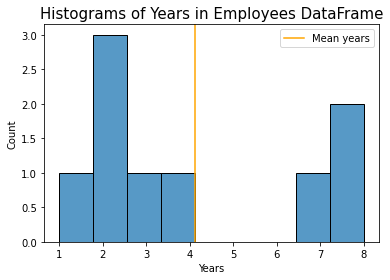

In [13]:
sns.histplot(employee.Years, bins = 9)
plt.axvline(employee.Years.mean(), c="orange", label="Mean years")
plt.title("Histograms of Years in Employees DataFrame", size=15)
plt.legend()


#### En este caso podriamos decir que la distribucion es normal, mientras que en el caso de abajo es uniforme

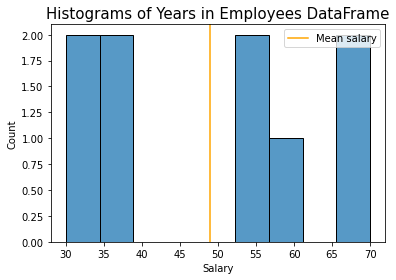

In [14]:
sns.histplot(employee.Salary, bins =9)
plt.axvline(employee.Salary.mean(), c="orange", label="Mean salary")
plt.title("Histograms of Years in Employees DataFrame", size=15)
plt.legend()

#### What's the average salary in this company?

In [15]:
employee.Salary.mean().round(2)

48.89

#### What's the highest salary?

In [16]:
employee.Salary.max()

70

#### What's the lowest salary?

In [17]:
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [18]:
low = employee[employee.Salary == employee.Salary.min()]
low

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [19]:
david = employee[employee.Name == "David"]
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [20]:
david_salary = int(david.Salary)
david_salary

30

#### Print all the rows where job title is associate

In [21]:
associate = employee[employee.Title == "associate"]
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [22]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [23]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [24]:
idx = np.where((employee["Title"] == "associate") & (employee["Salary"] > 55))
employee.loc[idx]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [25]:
employee.groupby("Years").mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [26]:
employee.groupby("Title").mean().round()

,Years,Salary
Title,,
VP,8.0,70.0
analyst,2.0,32.0
associate,4.0,57.0


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary'>

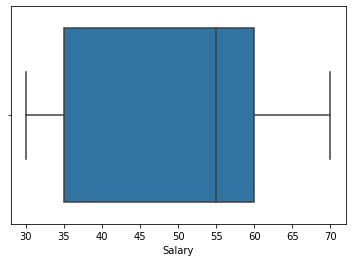

In [27]:
sns.boxplot(x = employee.Salary)

In [28]:
pd.Series(employee.Salary).quantile(.25)

35.0

In [29]:
pd.Series(employee.Salary).quantile(.75)

60.0

#### Is the mean salary per gender different?

In [30]:
employee.groupby("Gender").mean().round()

,Years,Salary
Gender,,
F,4.0,48.0
M,4.0,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [31]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
maxim = employee.groupby("Department").max()
maxim

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Sonia,Master,M,analyst,8,70
IT,Pedro,Phd,M,associate,8,70
Sales,Samuel,Master,M,associate,3,55


In [33]:
minim = employee.groupby("Department").min()
minim

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Ana,Bachelor,F,VP,2,30
IT,Carlos,Bachelor,F,VP,1,30
Sales,Eva,Bachelor,F,associate,2,55


In [64]:
diferencia_salarios = maxim.Salary - minim.Salary
diferencia_salarios

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [34]:
orders = pd.read_csv("Orders.zip")
orders.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
194269,278065,561208,21977,2011,7,1,16,pack of 60 pink paisley cake cases,120,2011-07-25 16:39:00,0.42,15372,United Kingdom,50.40
71898,110935,545701,22293,2011,3,7,15,hanging chick green decoration,7,2011-03-06 15:17:00,1.45,17107,United Kingdom,10.15
266656,371069,569210,23329,2011,10,7,11,decorative wicker heart large,25,2011-10-02 11:41:00,1.65,13681,United Kingdom,41.25
268505,372929,569253,23090,2011,10,1,10,vintage glass t-light holder,12,2011-10-03 10:55:00,0.83,13635,United Kingdom,9.96
372053,504315,578946,22301,2011,11,7,13,coffee mug cat + bird design,2,2011-11-27 13:47:00,2.55,16005,United Kingdom,5.10


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [35]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [36]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [37]:
orders.UnitPrice.mean().round(2)

3.12

#### What were the highest and lowest purchase prices? 

In [38]:
orders.UnitPrice.max().round(2)

8142.75

In [39]:
orders.UnitPrice.min().round(2)

0.0

#### Select all the customers we have in Spain

In [40]:
spain = orders[orders.Country == "Spain"]
spain.sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
88031,132853,547703,22077,2011,3,4,17,6 ribbons rustic charm,24,2011-03-24 17:10:00,1.65,12540,Spain,39.6
355414,482520,577476,21175,2011,11,7,11,gin + tonic diet metal sign,12,2011-11-20 11:31:00,2.55,12540,Spain,30.6
230851,326372,565519,POST,2011,9,1,11,postage,7,2011-09-05 11:52:00,28.00,12502,Spain,196.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [41]:
spain.value_counts()

Unnamed: 0  InvoiceNo  StockCode  year  month  day  hour  Description                      Quantity  InvoiceDate          UnitPrice  CustomerID  Country  amount_spent
6421        536944     22383      2010  12     5    12    lunch bag suki  design           70        2010-12-03 12:20:00  1.65       12557       Spain    115.50          1
347861      567340     21164      2011  9      1    15    home sweet home metal sign       6         2011-09-19 15:02:00  2.95       12540       Spain    17.70           1
347854      567340     21172      2011  9      1    15    party metal sign                 12        2011-09-19 15:02:00  1.45       12540       Spain    17.40           1
347855      567340     22176      2011  9      1    15    blue owl soft toy                12        2011-09-19 15:02:00  2.95       12540       Spain    35.40           1
347856      567340     23393      2011  9      1    15    home sweet home cushion cover    8         2011-09-19 15:02:00  3.75       12540       

#### Select all the customers who have bought more than 50 items ?

In [42]:
more_50 = orders[orders.Quantity > 50]
more_50.head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.0
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.2
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.4


#### Select orders from Spain that are above 50 items

In [43]:
idx = np.where((orders["Country"] == "Spain") & (orders["Quantity"] > 50))
spain_50 = orders.loc[idx]
spain_50.head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5


#### Select all free orders

In [44]:
free = orders[orders.UnitPrice == 0]
free.head(1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [45]:
lunch_bag = orders[orders["Description"].str.contains('w*(lunch bag)w*')==True]
lunch_bag.head()

/home/marcunu/.local/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [46]:
lb_2011 = lunch_bag[lunch_bag.year == 2011]
lb_2011.head(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.5
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.3


#### Show the frequency distribution of the amount spent in Spain.

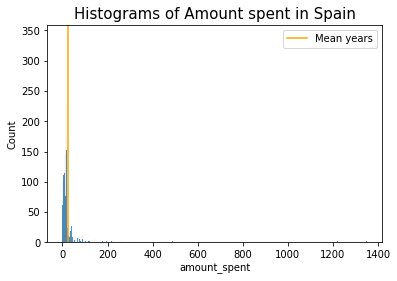

In [47]:
sns.histplot(spain.amount_spent)
plt.axvline(spain.amount_spent.mean(), c="orange", label="Mean years")
plt.title("Histograms of Amount spent in Spain", size=15)
plt.legend()


### Hacemos un zoom para observar mejor la distribución

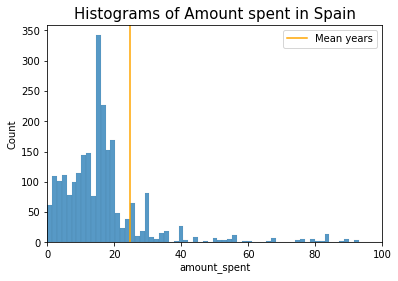

In [48]:
sns.histplot(spain.amount_spent).set_xlim([0,100])
plt.axvline(spain.amount_spent.mean(), c="orange", label="Mean years")
plt.title("Histograms of Amount spent in Spain", size=15)
plt.legend()


#### Select all orders made in the month of August

In [49]:
aug = orders[orders.month == 8] 
aug.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [50]:
aug.Country.value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

In [51]:
### Si lo queremos ver en formato porcentaje
aug.Country.value_counts(1)

United Kingdom     0.855329
Germany            0.029430
EIRE               0.021952
France             0.021064
Netherlands        0.010365
Switzerland        0.009884
Spain              0.009329
Belgium            0.007182
Israel             0.006330
Channel Islands    0.005183
Australia          0.003961
Italy              0.003517
Austria            0.003258
Norway             0.002850
Finland            0.002258
Malta              0.002036
Portugal           0.001518
Sweden             0.001481
Unspecified        0.000851
Iceland            0.000814
Poland             0.000629
Denmark            0.000592
Canada             0.000185
Name: Country, dtype: float64

#### What's the  average amount of money spent by country

In [57]:
country_mean = orders.groupby("Country").mean()
country_mean.head()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,
Australia,224857.287764,556217.951055,2010.972996,6.062447,3.354430,11.398312,71.062447,3.048523,12454.454008,116.895620
Austria,297239.085427,562367.633166,2010.979899,7.623116,2.778894,12.170854,12.263819,4.256030,12519.097990,25.624824
Bahrain,184964.000000,552790.411765,2011.000000,5.000000,1.705882,13.941176,15.294118,4.644118,12354.529412,32.258824
Belgium,276657.968981,560543.014279,2010.953225,7.404727,3.671098,12.225997,11.441162,3.630158,12430.675037,20.283772
Brazil,157314.500000,550201.000000,2011.000000,4.000000,5.000000,10.000000,11.125000,4.456250,12769.000000,35.737500


#### What's the most expensive item?

In [59]:
expensive = orders[orders.UnitPrice == orders.UnitPrice.max()]
expensive

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [60]:
year_mean = orders.groupby("year").mean()
year_mean.head()

,Unnamed: 0,InvoiceNo,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
year,,,,,,,,,
2010,19884.040482,538009.305122,12.000000,3.745528,12.897630,11.937309,3.132095,15529.088417,21.892733
2011,296660.861310,562207.976246,7.303803,3.605338,12.716328,13.098138,3.115054,15277.794830,22.430074
